In [1]:
!curl -o breast_cancer.data https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19889  100 19889    0     0  96082      0 --:--:-- --:--:-- --:--:-- 96082


In [2]:
!ls

breast_cancer.data  sample_data


In [0]:
import pandas as pd
df = pd.read_csv('breast_cancer.data', sep=',', 
                  names=["id", "clump_thickness", "unif_cell_size", "unif_cell_shape", "marg_adhesion", "single_epith_cell_size", "bare_nuclei", "bland_chrom", "norm_nuclei" \
                        , "mitoses", "class"])

In [4]:
print(df.head())

        id  clump_thickness  unif_cell_size  ...  norm_nuclei  mitoses  class
0  1000025                5               1  ...            1        1      2
1  1002945                5               4  ...            2        1      2
2  1015425                3               1  ...            1        1      2
3  1016277                6               8  ...            7        1      2
4  1017023                4               1  ...            1        1      2

[5 rows x 11 columns]


In [0]:
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

In [0]:
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

In [0]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [0]:
clf = neighbors.KNeighborsClassifier()

In [10]:
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9857142857142858


In [11]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,2,2,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures),-1)
prediction = clf.predict(example_measures)
print(prediction)

[2 2]


In [12]:
##Euclidean dist
from math import sqrt

plot1 = [1,3]
plot2 = [2,5]

euclidean_distance = sqrt( (plot1[0]-plot2[0])**2 +  (plot1[1]-plot2[1])**2 )
print(euclidean_distance)

2.23606797749979


In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import warnings
import random
style.use('fivethirtyeight')

In [0]:
dataset = {'k': [[1,2],[2,3],[3,1]], 'r': [[6,5],[7,7],[8,6]]}
new_feature = [5,7]

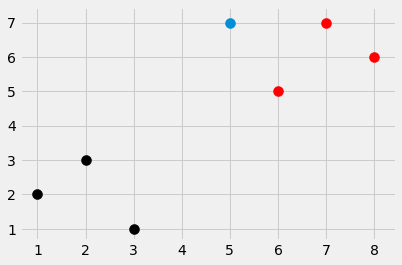

In [15]:
[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_feature[0], new_feature[1], s=100)
plt.show()

In [0]:
def k_nearest_neighbors(data, predict, k=3):
  if len(data) >=k :
    warnings.warn("K is set to a value less than total voting groups!")
  distances = []
  for groups in data:
    for features in data[groups]:
      euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
      distances.append([euclidean_distance, groups])
        
  votes = [i[1] for i in sorted(distances)[:k]]
  #print(Counter(votes).most_common(1))
  vote_result = Counter(votes).most_common(1)[0][0]
  return vote_result

In [17]:
result = k_nearest_neighbors(dataset, new_feature, k=3)
print(result)

r


In [0]:
df = pd.read_csv('breast_cancer.data', sep=',', 
                  names=["id", "clump_thickness", "unif_cell_size", "unif_cell_shape", "marg_adhesion", "single_epith_cell_size", "bare_nuclei", "bland_chrom", "norm_nuclei" \
                        , "mitoses", "class"])

In [19]:
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()
print(full_data[:10])

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0], [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0], [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]


In [20]:
random.shuffle(full_data)
print(20*'#')
print(full_data[:5])

####################
[[4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [4.0, 10.0, 8.0, 5.0, 4.0, 1.0, 10.0, 1.0, 1.0, 4.0], [10.0, 4.0, 4.0, 10.0, 6.0, 10.0, 5.0, 5.0, 1.0, 4.0], [10.0, 5.0, 5.0, 6.0, 3.0, 10.0, 7.0, 9.0, 2.0, 4.0]]


In [0]:
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [0]:
for i in train_data:
  train_set[i[-1]].append(i[:-1])

for i in test_data:
  test_set[i[-1]].append(i[:-1])  

In [23]:
correct = 0
total = 0

for group in test_set:
  for data in test_set[group]:
    vote = k_nearest_neighbors(train_set, data, k=5)
    if group == vote:
      correct += 1
    total += 1
print("Accuracy:", correct/total)    

Accuracy: 0.9640287769784173
